# Student ID-916467534

In [1]:
import pandas as pd
import csv
from pathlib import Path
import seaborn as sns
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")

In [2]:
te = TransactionEncoder()
data_array=[]
file_path='/Users/Assignment-1/Grocery_Items_67.csv'
with open(file_path, 'r') as file:
    csv_reader = csv.reader(file,None)
    header = next(csv_reader, None)
    
    for row in csv_reader:
        filtered_row = [cell for cell in row if cell.strip() != '']
        data_array.append(filtered_row)
te_ary = te.fit(data_array).transform(data_array)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [3]:
data_array

[['long life bakery product', 'butter milk'],
 ['rolls/buns', 'chocolate'],
 ['domestic eggs', 'rolls/buns'],
 ['rolls/buns', 'other vegetables'],
 ['onions', 'frozen vegetables', 'curd'],
 ['beef', 'newspapers', 'misc. beverages'],
 ['liver loaf', 'fruit/vegetable juice'],
 ['yogurt', 'rolls/buns'],
 ['domestic eggs', 'berries'],
 ['brown bread',
  'whole milk',
  'spread cheese',
  'butter',
  'fruit/vegetable juice'],
 ['bottled beer', 'semi-finished bread'],
 ['domestic eggs', 'sugar'],
 ['sausage', 'chicken', 'margarine', 'yogurt'],
 ['soda', 'root vegetables', 'semi-finished bread'],
 ['rolls/buns', 'bottled water', 'whole milk'],
 ['fruit/vegetable juice', 'long life bakery product'],
 ['tropical fruit', 'rolls/buns', 'candy'],
 ['butter milk', 'canned beer'],
 ['soda', 'root vegetables'],
 ['newspapers', 'cat food'],
 ['other vegetables', 'soda'],
 ['whole milk', 'pip fruit'],
 ['root vegetables', 'processed cheese', 'yogurt'],
 ['sausage', 'curd'],
 ['candy', 'berries', 'musta

In [4]:
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)

In [6]:
frequent_itemsets['length']=[len(i) for i in frequent_itemsets['itemsets']]

In [7]:
frequent_itemsets

,support,itemsets,length
0,0.018125,(butter milk),1
1,0.017625,(long life bakery product),1
2,0.109500,(rolls/buns),1
3,0.020750,(chocolate),1
4,0.037125,(domestic eggs),1
...,...,...,...
64,0.011000,"(other vegetables, rolls/buns)",2
65,0.014125,"(whole milk, rolls/buns)",2
66,0.014625,"(other vegetables, whole milk)",2
67,0.011375,"(whole milk, yogurt)",2


# what are the association rules you can extract from your dataset?

In [8]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.10950,0.123000,0.011000,0.100457,0.816720,-0.002469,0.974939,-0.201280
1,(rolls/buns),(whole milk),0.10950,0.155625,0.014125,0.128995,0.828886,-0.002916,0.969427,-0.188195
2,(other vegetables),(whole milk),0.12300,0.155625,0.014625,0.118902,0.764032,-0.004517,0.958322,-0.260444
3,(yogurt),(whole milk),0.08425,0.155625,0.011375,0.135015,0.867565,-0.001736,0.976173,-0.142878
4,(soda),(whole milk),0.09500,0.155625,0.011500,0.121053,0.777848,-0.003284,0.960666,-0.239878


In [9]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1).shape[0]

5

In [10]:
rows=4
cols=3
nd_array = np.zeros((rows, cols), dtype=int)

In [11]:
nd_array[0,0]

0

msv and mct (0.001, 0.05) Assocaition rules --529
msv and mct (0.001, 0.075) Assocaition rules --289
msv and mct (0.001, 0.1) Assocaition rules --158
msv and mct (0.005, 0.05) Assocaition rules --64
msv and mct (0.005, 0.075) Assocaition rules --43
msv and mct (0.005, 0.1) Assocaition rules --25
msv and mct (0.01, 0.05) Assocaition rules --10
msv and mct (0.01, 0.075) Assocaition rules --8
msv and mct (0.01, 0.1) Assocaition rules --5
msv and mct (0.05, 0.05) Assocaition rules --0
msv and mct (0.05, 0.075) Assocaition rules --0
msv and mct (0.05, 0.1) Assocaition rules --0


[Text(0.5, 23.52222222222222, 'mct'), Text(50.722222222222214, 0.5, 'msv')]

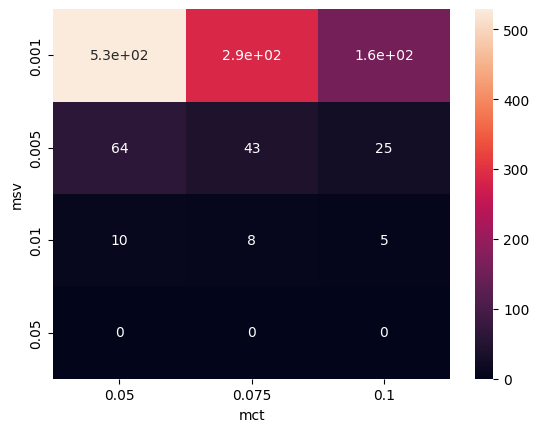

In [12]:
for count_i, i in enumerate([0.001, 0.005, 0.01, 0.05]):
    for count_j,j in enumerate([0.05, 0.075, 0.1]):
        
        frequent_itemsets = fpgrowth(df, min_support=i, use_colnames=True)
        frequent_itemsets['length']=[len(i) for i in frequent_itemsets['itemsets']]
        nd_array[count_i,count_j]=association_rules(frequent_itemsets, metric="confidence", min_threshold=j).shape[0]
        print(f'msv and mct {i,j} Assocaition rules --{nd_array[count_i,count_j]}')
data = pd.DataFrame(nd_array, columns=[0.05, 0.075, 0.1],index=[0.001, 0.005, 0.01, 0.05])
ax=sns.heatmap(data, annot=True)
ax.set(xlabel="mct", ylabel="msv")     

In [13]:
nd_array

array([[529, 289, 158],
       [ 64,  43,  25],
       [ 10,   8,   5],
       [  0,   0,   0]])

In [14]:
frequent_itemsets = fpgrowth(df, min_support=0.005, use_colnames=True)
rules=association_rules(frequent_itemsets, metric="confidence",min_threshold=0.0001)

In [15]:
rules['confidence'].max()

0.16449086161879894

# List the association rule(s) (i.e., one or more rules depending on your dataset) that have the highest confidence for minimum support = 0.005. What is that confidence value?

In [16]:
rules[rules['confidence']==0.16449086161879894]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(bottled beer),(whole milk),0.047875,0.155625,0.007875,0.164491,1.056969,0.000424,1.010611,0.056609


# Confidence value - 0.164491

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import cv2
import pathlib
from tqdm import tqdm
import os
import random
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

In [18]:
path='/Users/Assignment-1/Cropped'

In [19]:
four_label=['Walker_hound','Boston_bull','Lhasa','flat-coated_retriever']

In [20]:
desktop = pathlib.Path(path)
files=list(desktop.rglob("*/*"))

In [21]:
len(files),files[0]

(704,
 PosixPath('/Users/Assignment-1/Cropped/n02099267-flat-coated_retriever/n02099267_3077-0.jpg'))

In [22]:
def Label(path):
    file_path = str(Path(path))
    last_separator_index = file_path.rfind('/')
    second_last_separator_index = file_path.rfind('/', 0, last_separator_index)
    breed_folder = file_path[second_last_separator_index + 1:last_separator_index]
    if breed_folder == 'n02099267-flat-coated_retriever':
        breed_folder=breed_folder.split('-')[1]+'-'+breed_folder.split('-')[2]
    else:
        breed_folder=breed_folder.split('-')[1]
    return breed_folder

In [23]:
num_cls=4
label=[]
img=[]
training=[]
for i in files:
    i=os.path.normpath(i)
    img_array = cv2.imread(i)
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    new_array = cv2.resize(img_array, (128, 128), interpolation=cv2.INTER_AREA)

    label.append(Label(i))
    img.append(new_array)
paired_elements = list(zip(label, img))
random.shuffle(paired_elements)
shuffled_label, shuffled_img = zip(*paired_elements)

In [24]:
shuffled_img[0].shape

(128, 128)

In [25]:
x_train = np.array([row.astype(float)/255 for row in shuffled_img])

In [26]:
# np.array(shuffled_img).shape

In [27]:
x_train = np.expand_dims(x_train, -1)

In [28]:
x_train.shape

(704, 128, 128, 1)

In [29]:
type(x_train)

numpy.ndarray

In [30]:
# label=[four_label.index(i) if i in four_label else None for i in label ]
from keras.utils import to_categorical
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(label)
label = to_categorical(numeric_labels)

In [31]:
label=np.array(label)

In [32]:
model = keras.Sequential(
    [
        keras.Input(shape=(128,128,1)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(16, activation="relu"),
        layers.Dense(num_cls, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 31752)             0         
                                                                 
 dense (Dense)               (None, 16)                508048    
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 508196 (1.94 MB)
Trainable params: 508196 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [33]:
batch_size = 8
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

hist=model.fit(x_train, label, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
71/71 [==============================] - 1s 11ms/step - loss: 1.3353 - accuracy: 0.2735 - val_loss: 2.5768 - val_accuracy: 0.0000e+00
Epoch 2/20
71/71 [==============================] - 1s 9ms/step - loss: 1.2497 - accuracy: 0.3641 - val_loss: 2.2876 - val_accuracy: 0.0000e+00
Epoch 3/20
71/71 [==============================] - 1s 11ms/step - loss: 1.1215 - accuracy: 0.4991 - val_loss: 2.0812 - val_accuracy: 0.0142
Epoch 4/20
71/71 [==============================] - 1s 16ms/step - loss: 0.8520 - accuracy: 0.7371 - val_loss: 4.2080 - val_accuracy: 0.0000e+00
Epoch 5/20
71/71 [==============================] - 1s 16ms/step - loss: 0.4758 - accuracy: 0.9005 - val_loss: 4.5466 - val_accuracy: 0.0000e+00
Epoch 6/20
71/71 [==============================] - 1s 14ms/step - loss: 0.2705 - accuracy: 0.9556 - val_loss: 5.2340 - val_accuracy: 0.0000e+00
Epoch 7/20
71/71 [==============================] - 1s 16ms/step - loss: 0.1275 - accuracy: 0.9876 - val_loss: 5.7224 - val_accuracy: 0

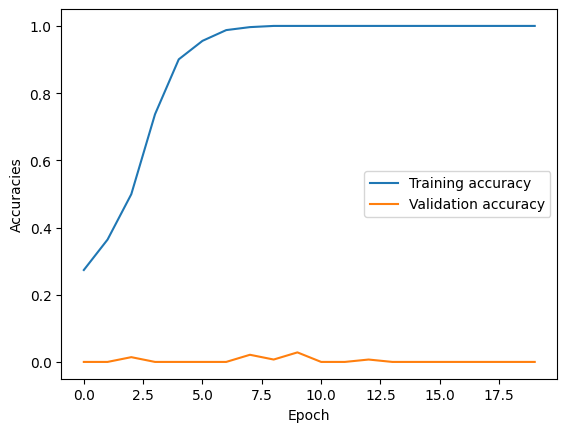

In [34]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

In [35]:
model = keras.Sequential(
    [
        keras.Input(shape=(128,128,1)),
        layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(16, activation="relu"),
        layers.Dense(num_cls, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 4)       40        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 4)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 15876)             0         
                                                                 
 dense_2 (Dense)             (None, 16)                254032    
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 254140 (992.73 KB)
Trainable params: 254140 (992.73 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [36]:
batch_size = 8
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

hist=model.fit(x_train, label, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
71/71 [==============================] - 1s 17ms/step - loss: 1.3586 - accuracy: 0.3179 - val_loss: 2.1578 - val_accuracy: 0.0000e+00
Epoch 2/20
71/71 [==============================] - 1s 16ms/step - loss: 1.3072 - accuracy: 0.3766 - val_loss: 2.4463 - val_accuracy: 0.0000e+00
Epoch 3/20
71/71 [==============================] - 1s 13ms/step - loss: 1.2912 - accuracy: 0.3464 - val_loss: 2.4478 - val_accuracy: 0.0000e+00
Epoch 4/20
71/71 [==============================] - 1s 20ms/step - loss: 1.2410 - accuracy: 0.4085 - val_loss: 2.3268 - val_accuracy: 0.0000e+00
Epoch 5/20
71/71 [==============================] - 2s 27ms/step - loss: 1.1851 - accuracy: 0.4529 - val_loss: 2.2106 - val_accuracy: 0.0000e+00
Epoch 6/20
71/71 [==============================] - 2s 22ms/step - loss: 1.1284 - accuracy: 0.4778 - val_loss: 2.3896 - val_accuracy: 0.0000e+00
Epoch 7/20
71/71 [==============================] - 1s 18ms/step - loss: 1.0576 - accuracy: 0.5204 - val_loss: 2.4560 - val_accura

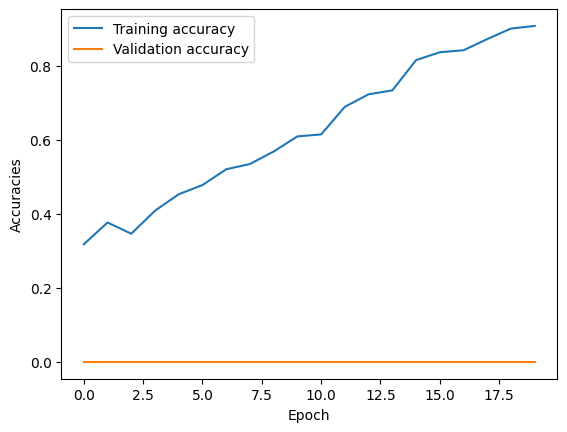

In [37]:
plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

In [38]:
model = keras.Sequential(
    [
        keras.Input(shape=(128,128,1)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(16, activation="relu"),
        layers.Dense(num_cls, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 63504)             0         
                                                                 
 dense_4 (Dense)             (None, 16)                1016080   
                                                                 
 dense_5 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1016308 (3.88 MB)
Trainable params: 1016308 (3.88 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [39]:
batch_size = 8
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

hist=model.fit(x_train, label, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
71/71 [==============================] - 2s 26ms/step - loss: 1.4451 - accuracy: 0.2984 - val_loss: 2.2764 - val_accuracy: 0.0000e+00
Epoch 2/20
71/71 [==============================] - 2s 24ms/step - loss: 1.2637 - accuracy: 0.4050 - val_loss: 1.8669 - val_accuracy: 0.0000e+00
Epoch 3/20
71/71 [==============================] - 1s 19ms/step - loss: 1.0724 - accuracy: 0.6110 - val_loss: 2.5447 - val_accuracy: 0.0000e+00
Epoch 4/20
71/71 [==============================] - 1s 19ms/step - loss: 0.8357 - accuracy: 0.7478 - val_loss: 3.1964 - val_accuracy: 0.0000e+00
Epoch 5/20
71/71 [==============================] - 1s 20ms/step - loss: 0.6182 - accuracy: 0.8366 - val_loss: 3.3820 - val_accuracy: 0.0000e+00
Epoch 6/20
71/71 [==============================] - 1s 20ms/step - loss: 0.4180 - accuracy: 0.9112 - val_loss: 2.3995 - val_accuracy: 0.0709
Epoch 7/20
71/71 [==============================] - 1s 19ms/step - loss: 0.2433 - accuracy: 0.9680 - val_loss: 3.3852 - val_accuracy: 

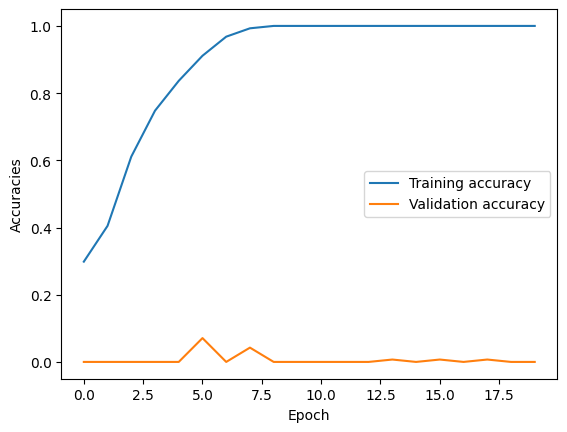

In [40]:
plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracies')
plt.legend()
plt.show()

## Describe and discuss what you observe by comparing the performance of the first model and the other two models you constructed in (a), (b) or (c) (depending on which one you did). Are there model overfit or underfit or just right?

# For all three models, its overfiting at the higher epochs as the difference between training accuracy and validation accuracy is very high. Model 2 performs better as the difference between training error and validiation error is not higher than other two. 

# References

# http://rasbt.github.io/mlxtend/
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://keras.io/examples/vision/mnist_convnet/
# https://www.analyticsvidhya.com/blog/2021/01/image-classification-using-convolutional-neural-networks-a-step-by-step-guide/#:~:text=To%20use%20CNN%20for%20image,based%20on%20the%20learned%20features.